In [1]:
# %load red_Cell.py
from openpiv import tools, pyprocess, scaling, filters, \
                    validation, process
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

from scipy import ndimage
from skimage import feature
# from PIL import Image

import imageio
from pylab import *
%matplotlib inline

from skimage.color import rgb2gray
from skimage import img_as_uint

frame_a  = imageio.imread('../test3/Y4-S3_Camera000398.tif')  
frame_b  = imageio.imread('../test3/Y4-S3_Camera000399.tif')

In [2]:
frame_a

Array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [42, 53, 42, ..., 65, 65, 65],
       [51, 61, 51, ..., 64, 66, 64],
       [59, 64, 59, ..., 63, 65, 63]], dtype=uint8)

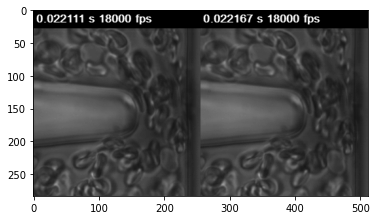

In [3]:
# for whatever reason the shape of frame_a is (3, 284, 256)
# so we first tranpose to the RGB image and then convert to the gray scale

# frame_a = img_as_uint(rgb2gray(frame_a))
# frame_b = img_as_uint(rgb2gray(frame_b))
plt.imshow(np.c_[frame_a,frame_b],cmap=plt.cm.gray)

In [4]:
# frame_a.dtype

In [5]:
u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32, overlap=8, dt=.1, sig2noise_method='peak2peak' )
#u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, window_size=32, overlap=8, dt=.1, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=32, overlap=8 )
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=32, overlap=8 )

In [6]:
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

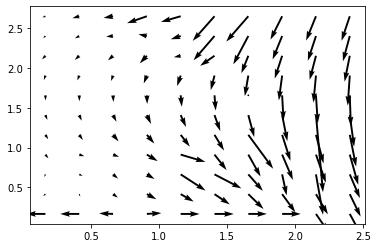

In [8]:
plt.figure()
plt.quiver(x,y,u,v)

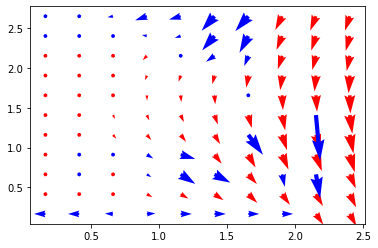

In [9]:
tools.save(x, y, u, v, mask, 'Y4-S3_Camera000398.txt' )
tools.display_vector_field('Y4-S3_Camera000398.txt', scale=3, width=0.0125)
# frame_vectors  = io.imshow(vectors)

In [10]:
x,y,u,v, mask = process.WiDIM(frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=32, overlap_ratio=0.25, coarse_factor=0, dt=0.1, validation_method='mean_velocity', trust_1st_iter=0, validation_iter=0, tolerance=0.7, nb_iter_max=1, sig2noise_method='peak2peak')

----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [284, 256])
('     ', 'total number of iterations', ' | ', 1)
('     ', 'overlap ratio', ' | ', 0.25)
('     ', 'coarse factor', ' | ', 0)
('     ', 'time step', ' | ', 0.10000000149011612)
('     ', 'validation method', ' | ', 'None')
('     ', 'number of validation iterations', ' | ', 0)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([11], dtype=int32))
('     ', 'Ncol', ' | ', array([10], dtype=int32))
('     ', 'Window sizes', ' | ', array([32], dtype=int32))
--------------------------------

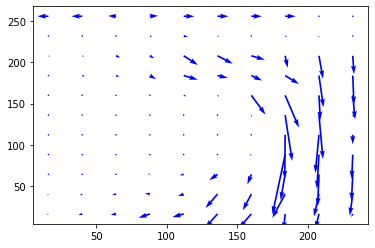

In [11]:
tools.save(x, y, u, v, zeros_like(u), 'Y4-S3_Camera000398.txt' )
tools.display_vector_field('Y4-S3_Camera000398.txt', scale=300, width=0.005)

In [12]:
x,y,u,v, mask = process.WiDIM(frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=16, overlap_ratio=0.25, coarse_factor=2, dt=0.1, validation_method='mean_velocity', trust_1st_iter=1, validation_iter=2, tolerance=0.7, nb_iter_max=4, sig2noise_method='peak2peak')

----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [284, 256])
('     ', 'total number of iterations', ' | ', 4)
('     ', 'overlap ratio', ' | ', 0.25)
('     ', 'coarse factor', ' | ', 2)
('     ', 'time step', ' | ', 0.10000000149011612)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 2)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([ 5, 11, 23, 23], dtype=int32))
('     ', 'Ncol', ' | ', array([ 5, 10, 21, 21], dtype=int32))
('     ', 'Window sizes', ' | ', array([64, 32, 16, 16], d

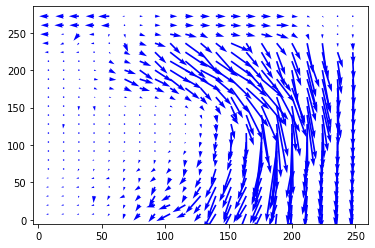

In [13]:
tools.save(x, y, u, v, zeros_like(u), 'Y4-S3_Camera000398.txt' )
tools.display_vector_field('Y4-S3_Camera000398.txt', scale=300, width=0.005)